### Prediction Model With Logistic Regression (Predict a Match or No Match)

In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pandas as pd

# File to Load - these are the attributes/preferences/opinions/perception fron the person taking the survey
file_to_load = "Resources/imputed_attributes_collapsed.csv"

# Read Speed Dating File that is the personal preference survey responses and store into Pandas data frame
attrc_df = pd.read_csv(file_to_load)

#show first 5 records of dataframe
attrc_df.head()

,iid,id,gender,idg,condtn,wave,round,position,order,partner,...,sinc_3,intel_3,fun_3,amb_3,attr_5,sinc_5,intel_5,fun_5,amb_5,shar_5
0,1,1,0,1,1,1,10,7,4,1,...,7.556636,7.844149,7.448836,6.944615,26.279678,11.27263,12.105101,15.021821,9.449693,11.198045
1,2,2,0,3,1,1,10,3,10,1,...,6.471522,8.882882,8.464037,5.303964,26.279678,11.27263,12.105101,15.021821,9.449693,11.198045
2,3,3,0,5,1,1,10,9,6,1,...,8.298283,8.223752,8.031198,7.623964,26.279678,11.27263,12.105101,15.021821,9.449693,11.198045
3,4,4,0,7,1,1,10,6,3,1,...,7.507005,7.739850,7.694862,6.867314,26.279678,11.27263,12.105101,15.021821,9.449693,11.198045
4,5,5,0,9,1,1,10,4,1,1,...,6.128010,8.575157,8.447643,8.748288,26.279678,11.27263,12.105101,15.021821,9.449693,11.198045


In [2]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=12)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [3]:
attrc_df['match'].value_counts()

0    468
1     83
Name: match, dtype: int64

### Number of matches by gender

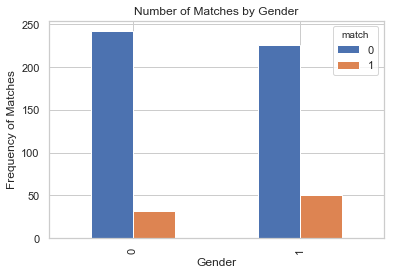

In [4]:
%matplotlib inline
pd.crosstab(attrc_df.gender,attrc_df.match).plot(kind='bar')
plt.title('Number of Matches by Gender')
plt.xlabel('Gender')
plt.ylabel('Frequency of Matches')
plt.savefig('static/images/Matchgender_histo.png')

### How Does the Respondent Believe they "Measure Up" to their Partner's Expectations?

### Attractiveness

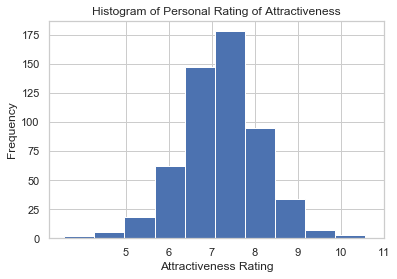

In [5]:
attrc_df.attr_3.hist()
plt.xticks(np.arange(5,12))
plt.title('Histogram of Personal Rating of Attractiveness')
plt.xlabel('Attractiveness Rating')
plt.ylabel('Frequency')
plt.savefig('static/images/Attractiveness_histo.png')

### Sincerity

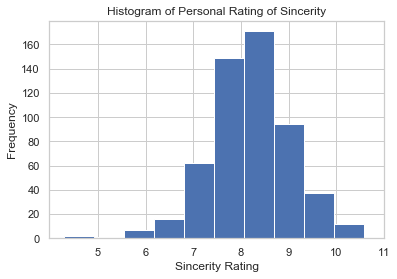

In [6]:
attrc_df.sinc_3.hist()
plt.xticks(np.arange(5,12))
plt.title('Histogram of Personal Rating of Sincerity')
plt.xlabel('Sincerity Rating')
plt.ylabel('Frequency')
plt.savefig('static/images/Sincerity_histo.png')

### Intelligence

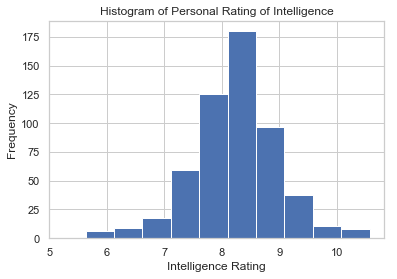

In [7]:
attrc_df.intel_3.hist()
plt.xticks(np.arange(5,11))
plt.title('Histogram of Personal Rating of Intelligence')
plt.xlabel('Intelligence Rating')
plt.ylabel('Frequency')
plt.savefig('static/images/Intelligence_histo.png')

### Fun

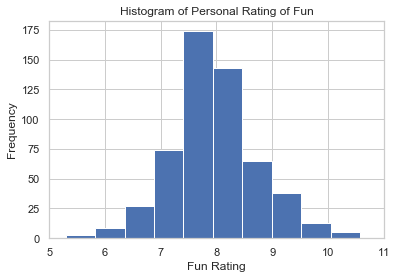

In [8]:
attrc_df.fun_3.hist()
plt.xticks(np.arange(5,12))
plt.title('Histogram of Personal Rating of Fun')
plt.xlabel('Fun Rating')
plt.ylabel('Frequency')
plt.savefig('static/images/Fun_histo.png')

### Ambition

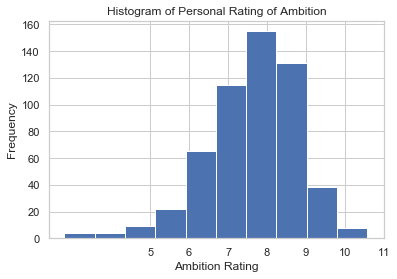

In [9]:
attrc_df.amb_3.hist()
plt.xticks(np.arange(5,12))
plt.title('Histogram of Personal Rating of Ambition')
plt.xlabel('Ambition Rating')
plt.ylabel('Frequency')
plt.savefig('static/images/Ambition_histo.png')

In [10]:
cat_var=['gender', 'samerace']

for var in cat_var:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(attrc_df[var], prefix=var)
    attrc_df=attrc_df.join(cat_list)
   

In [11]:
attrc_df.head()

,iid,id,gender,idg,condtn,wave,round,position,order,partner,...,attr_5,sinc_5,intel_5,fun_5,amb_5,shar_5,gender_0,gender_1,samerace_0,samerace_1
0,1,1,0,1,1,1,10,7,4,1,...,26.279678,11.27263,12.105101,15.021821,9.449693,11.198045,1,0,1,0
1,2,2,0,3,1,1,10,3,10,1,...,26.279678,11.27263,12.105101,15.021821,9.449693,11.198045,1,0,0,1
2,3,3,0,5,1,1,10,9,6,1,...,26.279678,11.27263,12.105101,15.021821,9.449693,11.198045,1,0,0,1
3,4,4,0,7,1,1,10,6,3,1,...,26.279678,11.27263,12.105101,15.021821,9.449693,11.198045,1,0,0,1
4,5,5,0,9,1,1,10,4,1,1,...,26.279678,11.27263,12.105101,15.021821,9.449693,11.198045,1,0,0,1


In [12]:
model1vars_df = attrc_df[['match', 'age','gender_1','samerace_1','attr_3','sinc_3','intel_3','fun_3','amb_3']]
model1vars_df.head()

,match,age,gender_1,samerace_1,attr_3,sinc_3,intel_3,fun_3,amb_3
0,0,21.0,0,0,6.154252,7.556636,7.844149,7.448836,6.944615
1,0,24.0,0,1,7.053999,6.471522,8.882882,8.464037,5.303964
2,0,25.0,0,1,7.410997,8.298283,8.223752,8.031198,7.623964
3,0,23.0,0,1,6.600301,7.507005,7.739850,7.694862,6.867314
4,0,21.0,0,1,6.031650,6.128010,8.575157,8.447643,8.748288


In [13]:
model1vars_df = model1vars_df.round()


In [14]:
model1vars_df.dropna(subset=['match'])

,match,age,gender_1,samerace_1,attr_3,sinc_3,intel_3,fun_3,amb_3
0,0,21.0,0,0,6.0,8.0,8.0,7.0,7.0
1,0,24.0,0,1,7.0,6.0,9.0,8.0,5.0
2,0,25.0,0,1,7.0,8.0,8.0,8.0,8.0
3,0,23.0,0,1,7.0,8.0,8.0,8.0,7.0
4,0,21.0,0,1,6.0,6.0,9.0,8.0,9.0
5,0,23.0,0,0,6.0,8.0,8.0,8.0,6.0
6,0,22.0,0,0,7.0,8.0,8.0,7.0,7.0
7,0,25.0,0,1,7.0,7.0,8.0,8.0,8.0
8,0,26.0,0,0,7.0,8.0,9.0,8.0,8.0
9,0,26.0,0,1,8.0,8.0,9.0,8.0,9.0


In [15]:
y=model1vars_df['match']
X=model1vars_df[[i for i in model1vars_df.columns if i !='match']]
print(X.shape, y.shape)

(551, 8) (551,)


In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify=y)

In [17]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [18]:
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [19]:
classifier.score(X_test, y_test)

0.8478260869565217

In [20]:
print(f"Training Data Score: {classifier.score(X_train, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test, y_test)}")

Training Data Score: 0.8498789346246973
Testing Data Score: 0.8478260869565217


In [21]:
predictions = classifier.predict(X_test)
print(f"First 10 Predictions:   {predictions[:10]}")
print(f"First 10 Actual labels: {y_test[:10].tolist()}")

First 10 Predictions:   [0 0 0 0 0 0 0 0 0 0]
First 10 Actual labels: [0, 1, 0, 0, 1, 0, 0, 0, 0, 0]


In [22]:
predictions = classifier.predict(X_test)
prediction_df = pd.DataFrame({"Prediction": predictions, "Actual": y_test})
prediction_df

,Prediction,Actual
488,0,0
185,0,1
273,0,0
303,0,0
233,0,1
466,0,0
291,0,0
529,0,0
396,0,0
29,0,0


In [23]:
#Repeat dependencies just in case

import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=12)
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

C:\Users\krist\Anaconda\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


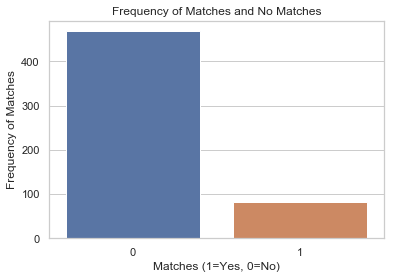

In [24]:
sns.countplot(x="match", data=model1vars_df)
plt.title('Frequency of Matches and No Matches')
plt.xlabel('Matches (1=Yes, 0=No)')
plt.ylabel('Frequency of Matches')
plt.savefig('static/images/match_counts.png')

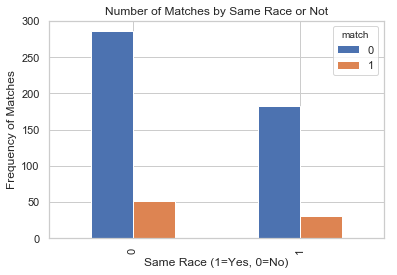

In [25]:
%matplotlib inline
pd.crosstab(attrc_df.samerace,attrc_df.match).plot(kind='bar')
plt.title('Number of Matches by Same Race or Not')
plt.xlabel('Same Race (1=Yes, 0=No)')
plt.ylabel('Frequency of Matches')
plt.savefig('static/images/Matchbysamerace.png')

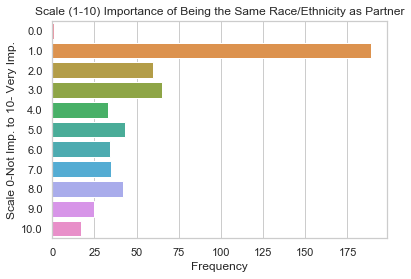

In [26]:
#Importance of being the same Race/Ethnicity as partner
sns.countplot(y="imprace", data=attrc_df)
plt.title('Scale (1-10) Importance of Being the Same Race/Ethnicity as Partner')
plt.xlabel('Frequency')
plt.ylabel('Scale 0-Not Imp. to 10- Very Imp.')
plt.savefig('static/images/impracedistr.png')

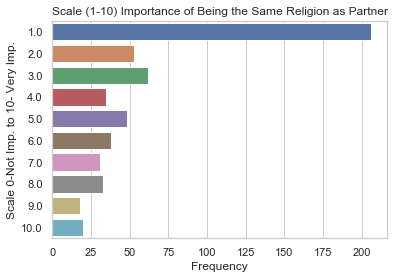

In [27]:
#Importance of Religion
sns.countplot(y="imprelig", data=attrc_df)
plt.title('Scale (1-10) Importance of Being the Same Religion as Partner')
plt.xlabel('Frequency')
plt.ylabel('Scale 0-Not Imp. to 10- Very Imp.')
plt.savefig('static/images/impreligdistr.png')

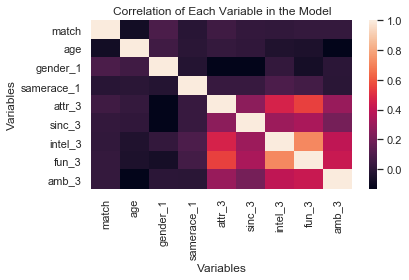

In [28]:
sns.heatmap(model1vars_df.corr())
plt.title('Correlation of Each Variable in the Model')
plt.xlabel('Variables')
plt.ylabel('Variables')
plt.tight_layout()
plt.savefig('static/images/corr.png')

In [29]:
y_pred = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[117   0]
 [ 21   0]]


In [30]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(classifier.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.85


In [31]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.85      1.00      0.92       117
          1       0.00      0.00      0.00        21

avg / total       0.72      0.85      0.78       138



C:\Users\krist\Anaconda\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


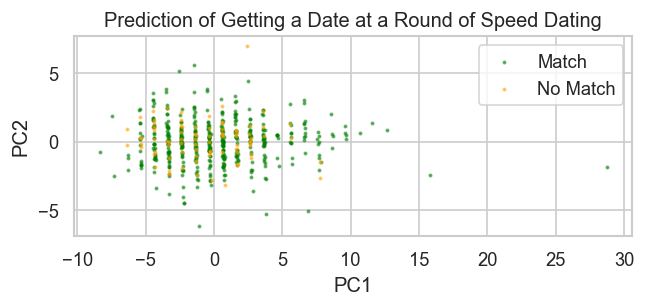

In [32]:
from sklearn.decomposition import PCA
X = model1vars_df.iloc[:,1:]
y = model1vars_df.iloc[:,0]
pca = PCA(n_components=2).fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(pca, y, random_state=0)

plt.figure(dpi=120)
plt.scatter(pca[y.values==0,0], pca[y.values==0,1], alpha=0.5, label='Match', s=2, color='green')
plt.scatter(pca[y.values==1,0], pca[y.values==1,1], alpha=0.5, label='No Match', s=2, color='orange')
plt.legend()
plt.title('Prediction of Getting a Date at a Round of Speed Dating')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.gca().set_aspect('equal')
plt.savefig('static/images/PCanalysis.png')

In [33]:
import pickle

In [34]:
filename="./model/predictor_model"
pickle.dump(classifier, open(filename, 'wb'))